In [10]:
import pycisTopic
import pickle
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import os

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [11]:
if not os.path.exists(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data.tsv"
):
    with open(
        "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.pkl",
        "rb",
    ) as f:
        cto = pickle.load(f)

    cto.cell_data["UMAP_1"] = cto.projections["cell"]["UMAP"]["UMAP_1"]
    cto.cell_data["UMAP_2"] = cto.projections["cell"]["UMAP"]["UMAP_2"]

    cto.cell_data["tSNE_1"] = cto.projections["cell"]["tSNE"]["tSNE_1"]
    cto.cell_data["tSNE_2"] = cto.projections["cell"]["tSNE"]["tSNE_2"]

    df = cto.cell_data

    df.to_csv(
        "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data.tsv",
        sep="\t",
        index=True,
        header=True,
    )

# Integration evaluation using LISI

In [12]:
from harmonypy.lisi import compute_lisi
import seaborn as sns
import math
import os

In [13]:
if not os.path.exists(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data.tsv"
):
    df = pd.read_csv(
        "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data.tsv",
        sep="\t",
        index_col=0,
        header=0,
    )

    df["center"] = [x.split("_")[0] for x in df["sample_id"]]

    cto.cell_data["center"] = [x.split("_")[0] for x in cto.cell_data["sample_id"]]

    cto.cell_data["tech_center"] = cto.cell_data["tech"] + "_" + cto.cell_data["center"]

    df["tech_center"] = df["tech"] + "_" + df["center"]

    dimreduc_list = ["tSNE", "UMAP"]
    var_list = ["sample_id", "tech", "center", "tech_center", "consensus_cell_type"]

    for dimreduc in dimreduc_list:
        for var in var_list:
            if not f"{dimreduc}_LISI_by_{var}" in df.columns:
                lisi = compute_lisi(
                    cto.projections["cell"][dimreduc].to_numpy(),
                    metadata=cto.cell_data,
                    label_colnames=[var],
                )
                df[f"{dimreduc}_LISI_by_{var}"] = lisi
            else:
                print(f"{dimreduc}_LISI_by_{var} already in columns")

    df.to_csv(
        "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data.tsv",
        sep="\t",
        index=True,
        header=True,
    )

# Plot

In [22]:
df = pd.read_csv(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data.tsv",
    sep="\t",
    index_col=0,
    header=0,
)
df["center"] = [x.split("_")[0] for x in df["sample_id"]]
df["tech_center"] = df["tech"] + "_" + df["center"]

<AxesSubplot: xlabel='tSNE_1', ylabel='tSNE_2'>

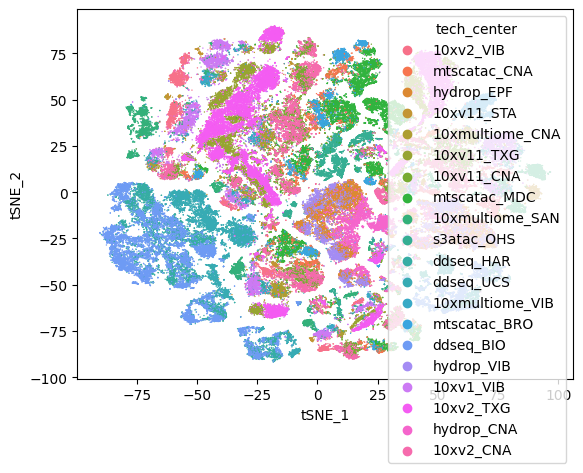

In [24]:
sns.scatterplot(df, x="tSNE_1", y="tSNE_2", s=1, linewidth=0, hue="tech_center")

# check with harmony

In [13]:
# if not os.path.exists(
#     "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data.tsv"
# ):
#     with open(
#         "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl",
#         "rb",
#     ) as f:
#         cto = pickle.load(f)

#     cto.cell_data["UMAP_1"] = cto.projections["cell"]["UMAP"]["UMAP_1"]
#     cto.cell_data["UMAP_2"] = cto.projections["cell"]["UMAP"]["UMAP_2"]

#     cto.cell_data["tSNE_1"] = cto.projections["cell"]["tSNE"]["tSNE_1"]
#     cto.cell_data["tSNE_2"] = cto.projections["cell"]["tSNE"]["tSNE_2"]

#     cto.cell_data["UMAP_1_harmony"] = cto.projections["cell"]["UMAP_harmony"]["UMAP_1"]
#     cto.cell_data["UMAP_2_harmony"] = cto.projections["cell"]["UMAP_harmony"]["UMAP_2"]

#     cto.cell_data["tSNE_1_harmony"] = cto.projections["cell"]["tSNE_harmony"]["tSNE_1"]
#     cto.cell_data["tSNE_2_harmony"] = cto.projections["cell"]["tSNE_harmony"]["tSNE_2"]

#     df = cto.cell_data

#     df.to_csv(
#         "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data.tsv",
#         sep="\t",
#         index=True,
#         header=True,
#     )

In [25]:
txg_reduc_dict = {
    "s3atac": "s3atac",
    "10xmultiome": "10xmultiome",
    "10xv11": "10x",
    "hydrop": "hydrop",
    "10xv2": "10x",
    "ddseq": "ddseq",
    "mtscatac": "mtscatac",
    "10xv1": "10x",
}

In [36]:
dimreduc_list = ["tSNE", "UMAP", "tSNE_harmony", "UMAP_harmony"]
var_list = [
    "sample_id",
    "tech",
    "center",
    "tech_center",
    "seurat_cell_type_full_mega_harmony_consensus",
    "seurat_cell_type_full_mega_consensus",
    "tech_reduc",
]

In [38]:
df = pd.read_csv(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data__updated.tsv",
    sep="\t",
    index_col=0,
    header=0,
)

df["center"] = [x.split("_")[0] for x in df["sample_id"]]

cto.cell_data["center"] = [x.split("_")[0] for x in cto.cell_data["sample_id"]]

cto.cell_data["tech_center"] = cto.cell_data["tech"] + "_" + cto.cell_data["center"]

df["tech_center"] = df["tech"] + "_" + df["center"]

cto.cell_data["tech_reduc"] = [txg_reduc_dict[x] for x in cto.cell_data["tech"]]

for dimreduc in dimreduc_list:
    for var in var_list:
        if not f"{dimreduc}_LISI_by_{var}" in df.columns:
            lisi = compute_lisi(
                cto.projections["cell"][dimreduc].to_numpy(),
                metadata=cto.cell_data,
                label_colnames=[var],
            )
            df[f"{dimreduc}_LISI_by_{var}"] = lisi
        else:
            print(f"{dimreduc}_LISI_by_{var} already in columns")

df.to_csv(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data__updated.tsv",
    sep="\t",
    index=True,
    header=True,
)

tSNE_LISI_by_sample_id already in columns
tSNE_LISI_by_tech already in columns
tSNE_LISI_by_center already in columns
tSNE_LISI_by_tech_center already in columns


# plot


In [39]:
df = pd.read_csv(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data__updated.tsv",
    sep="\t",
    index_col=0,
    header=0,
)

/tmp/ipykernel_2492018/890939925.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [40]:
df.columns

Index(['cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'cisTopic_nr_frag',
       'cisTopic_log_nr_frag', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'fmx_droplet_type', 'fmx_sample',
       'pycisTopic_leiden_10_3.0', 'seurat_cell_type_pred_score_individual',
       'seurat_cell_type_individual', 'consensus_cell_type_individual',
       'seurat_cell_type_full_mega', 'seurat_cell_type_full_mega_pred_score',
       'seurat_cell_type_full_mega_consensus', 'consensus_cell_type', 'tech',
       'harmony_pycisTopic_leiden_10_3.0',
       'seurat_cell_type_full_mega_harmony_consensus', 'UMAP_1', 'UMAP_2',
       'tSNE_1', 'tSNE_2', 'center', 'tech_center', 'tSNE_LISI_by_sample_id',
       'tSNE_LISI_by_tech', 'tSNE_LISI_by_center', 'tSNE_LISI_b

In [41]:
df_lisi = df[list([x for x in df.columns if "LISI" in x])]

In [42]:
df_lisi["sample"] = [x.split("___")[1].split(".")[0] for x in df_lisi.index]
df_lisi["tech"] = [x.split("_")[1] for x in df_lisi["sample"]]
df_lisi["centre"] = [x.split("_")[0] for x in df_lisi["sample"]]
df_lisi["tech_centre"] = df_lisi["tech"] + "_" + df_lisi["centre"]

In [43]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [44]:
df_lisi.columns

Index(['tSNE_LISI_by_sample_id', 'tSNE_LISI_by_tech', 'tSNE_LISI_by_center',
       'tSNE_LISI_by_tech_center',
       'tSNE_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
       'tSNE_LISI_by_seurat_cell_type_full_mega_consensus',
       'tSNE_LISI_by_tech_reduc', 'UMAP_LISI_by_sample_id',
       'UMAP_LISI_by_tech', 'UMAP_LISI_by_center', 'UMAP_LISI_by_tech_center',
       'UMAP_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
       'UMAP_LISI_by_seurat_cell_type_full_mega_consensus',
       'UMAP_LISI_by_tech_reduc', 'tSNE_harmony_LISI_by_sample_id',
       'tSNE_harmony_LISI_by_tech', 'tSNE_harmony_LISI_by_center',
       'tSNE_harmony_LISI_by_tech_center',
       'tSNE_harmony_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
       'tSNE_harmony_LISI_by_seurat_cell_type_full_mega_consensus',
       'tSNE_harmony_LISI_by_tech_reduc', 'UMAP_harmony_LISI_by_sample_id',
       'UMAP_harmony_LISI_by_tech', 'UMAP_harmony_LISI_by_center',
       'UMAP_harmony_LISI_by

In [45]:
reduc_alias_dict = {
    "s3atac": "s3atac",
    "10xmultiome": "10xmultiome",
    "10xv11": "10x",
    "hydrop": "hydrop",
    "10xv2": "10x",
    "ddseq": "ddseq",
    "mtscatac": "10xmtscatac",
    "10xv1": "10x",
}

In [46]:
df_lisi["tech_reduc"] = [reduc_alias_dict[x] for x in df["tech"]]

tSNE_LISI_by_sample_id


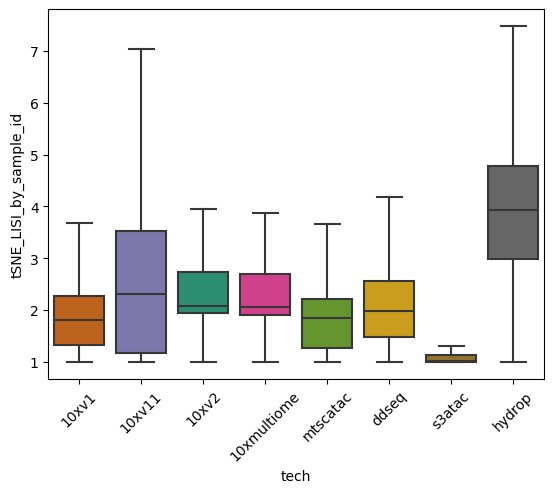

tSNE_LISI_by_tech


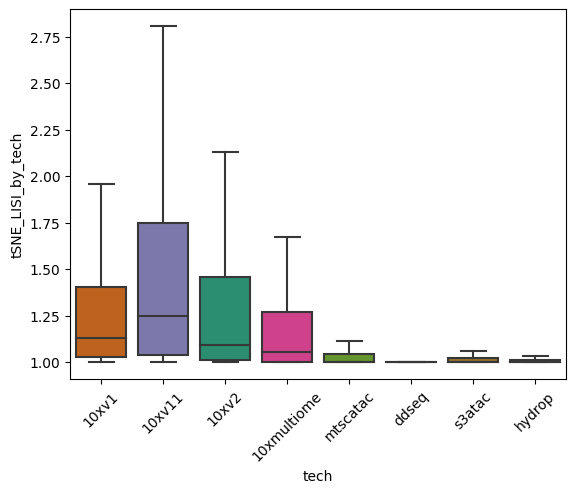

tSNE_LISI_by_center


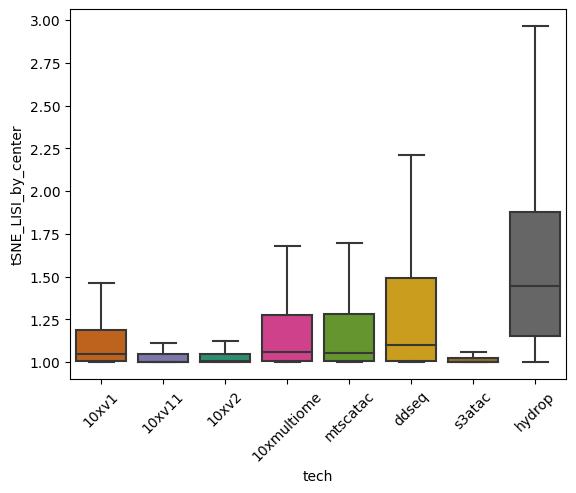

tSNE_LISI_by_tech_center


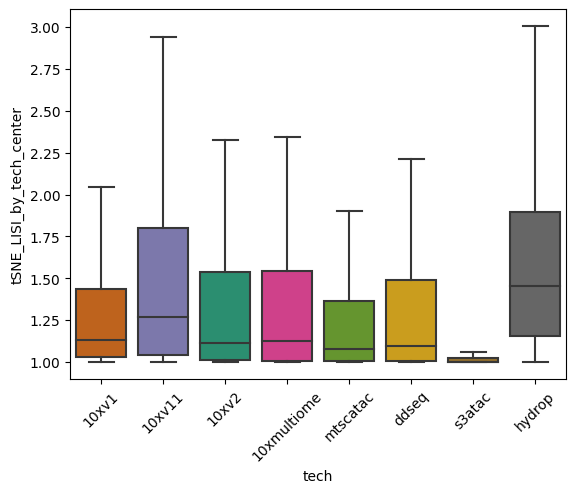

tSNE_LISI_by_seurat_cell_type_full_mega_harmony_consensus


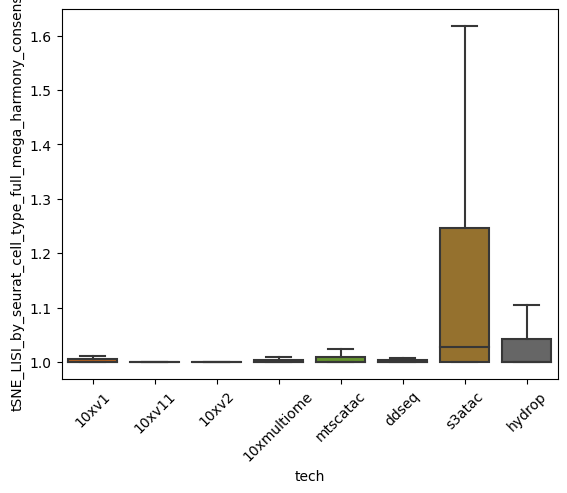

tSNE_LISI_by_seurat_cell_type_full_mega_consensus


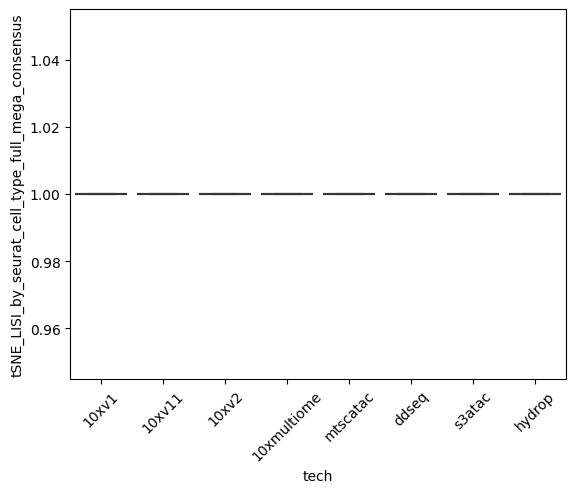

tSNE_LISI_by_tech_reduc


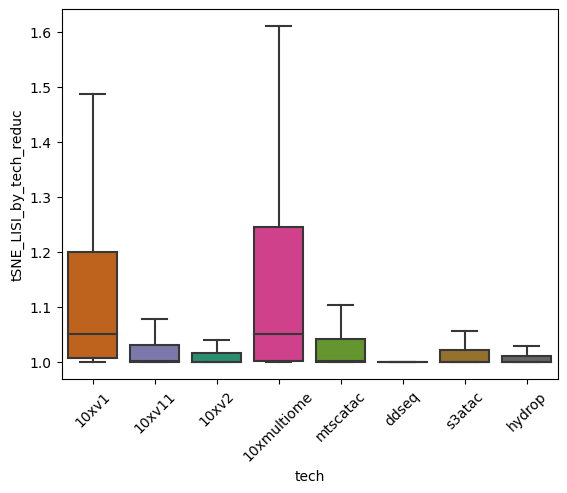

UMAP_LISI_by_sample_id


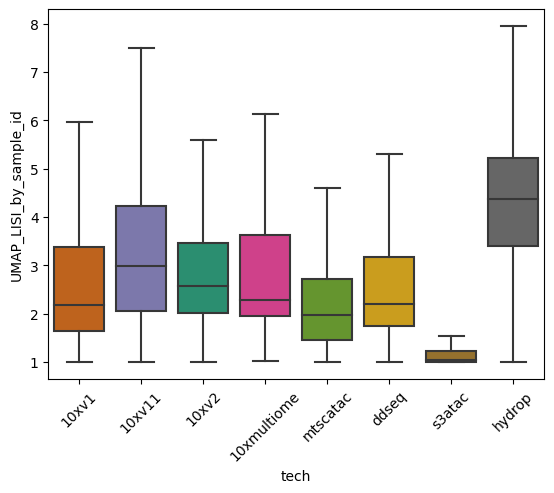

UMAP_LISI_by_tech


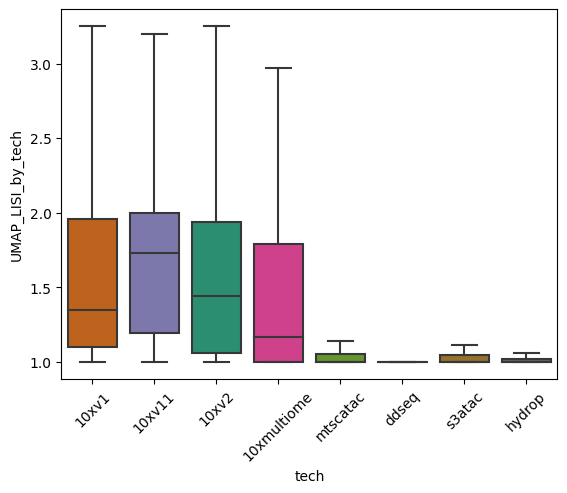

UMAP_LISI_by_center


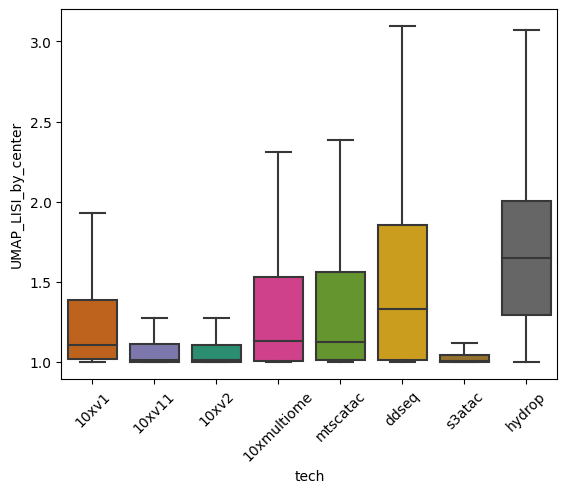

UMAP_LISI_by_tech_center


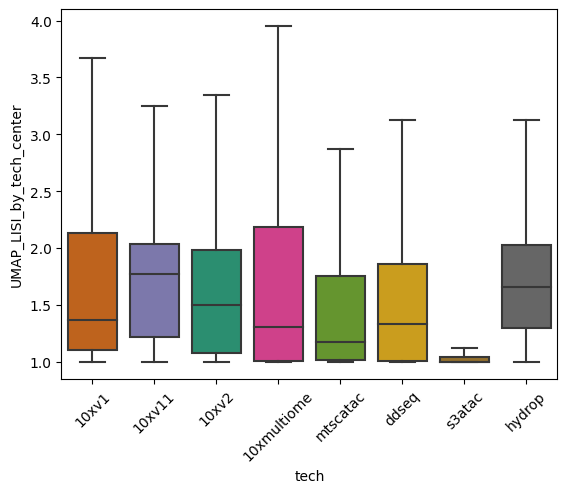

UMAP_LISI_by_seurat_cell_type_full_mega_harmony_consensus


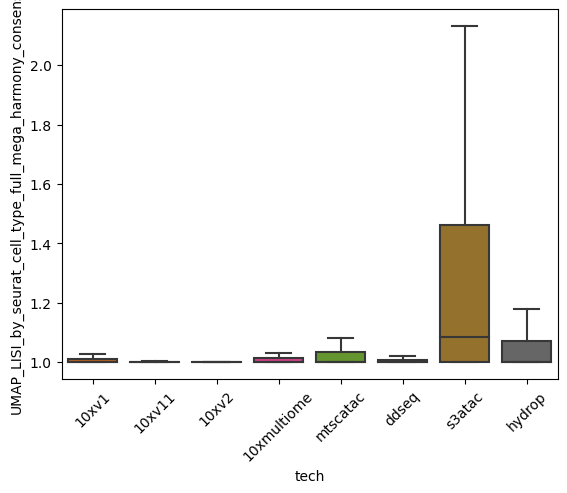

UMAP_LISI_by_seurat_cell_type_full_mega_consensus


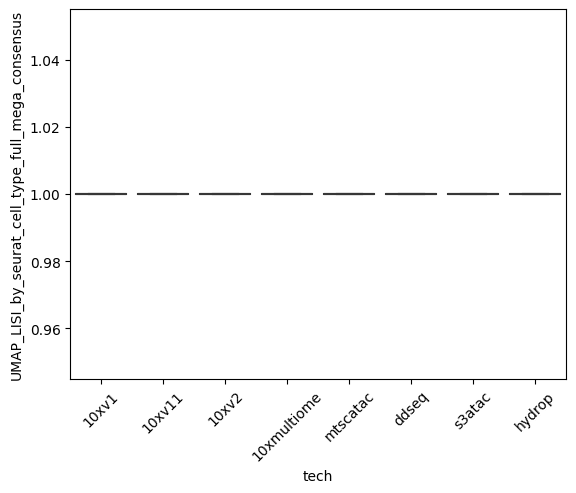

UMAP_LISI_by_tech_reduc


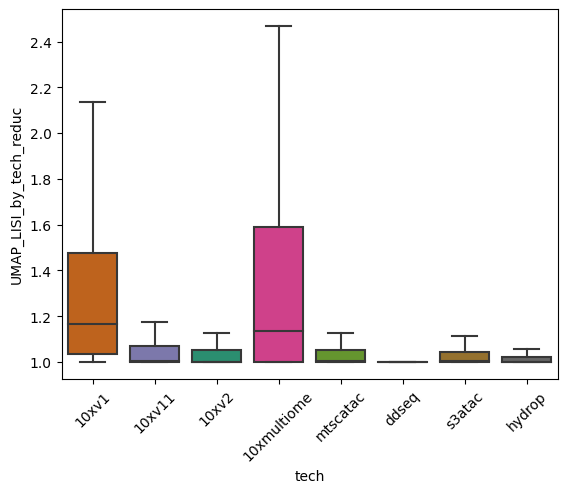

tSNE_harmony_LISI_by_sample_id


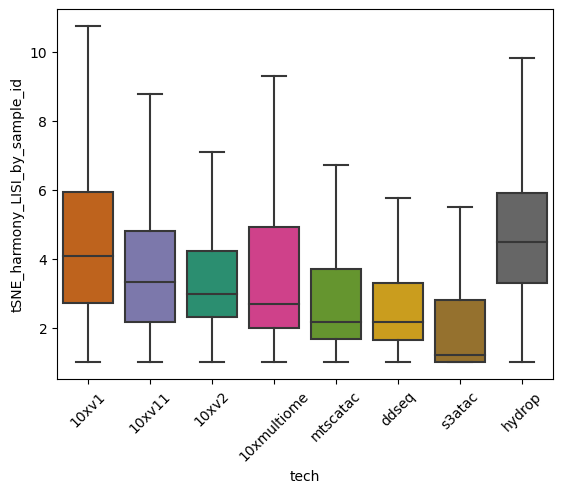

tSNE_harmony_LISI_by_tech


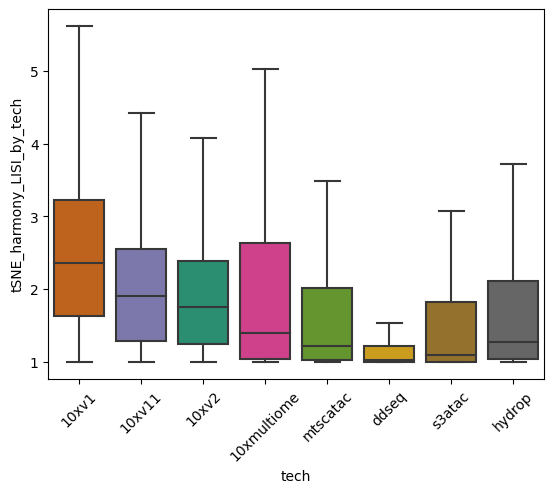

tSNE_harmony_LISI_by_center


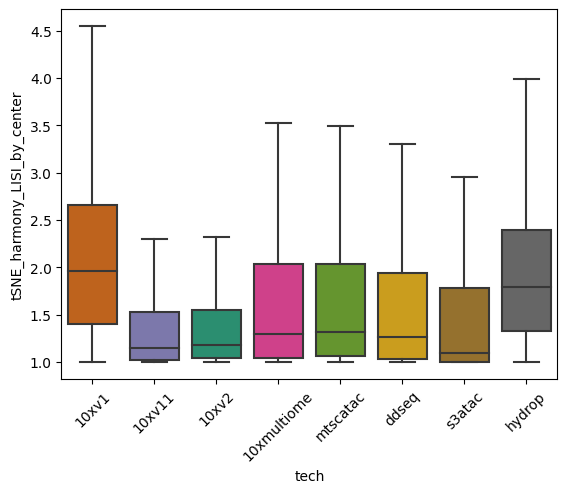

tSNE_harmony_LISI_by_tech_center


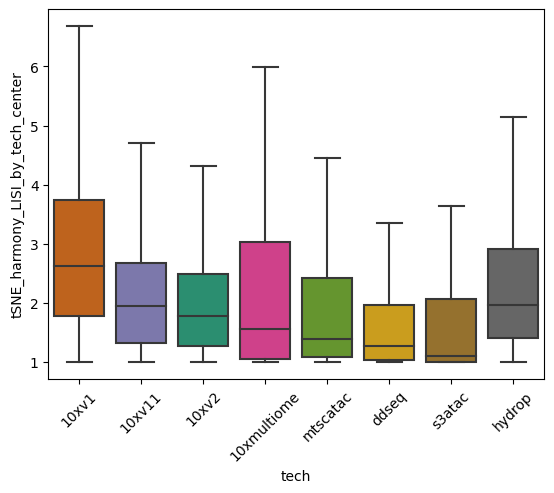

tSNE_harmony_LISI_by_seurat_cell_type_full_mega_harmony_consensus


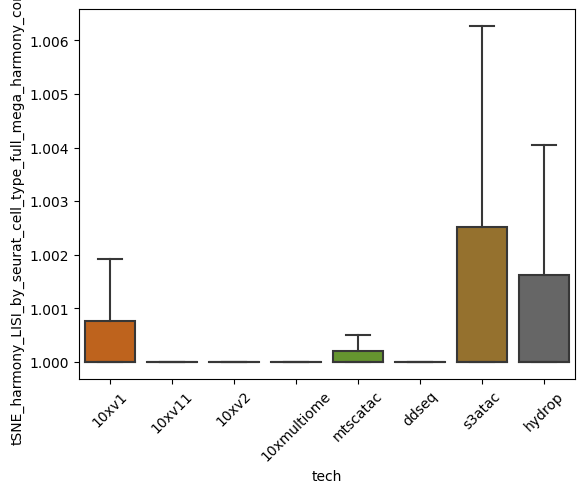

tSNE_harmony_LISI_by_seurat_cell_type_full_mega_consensus


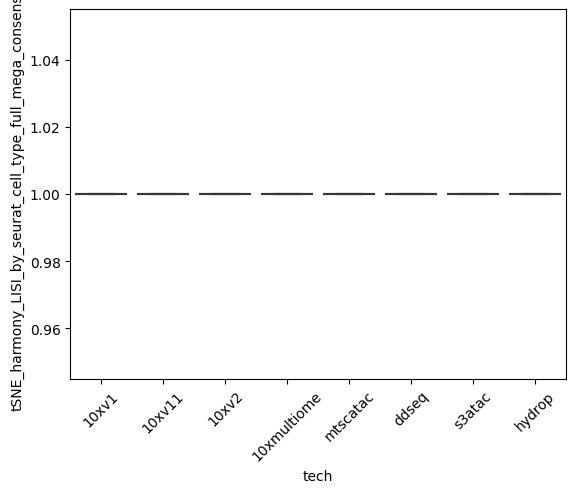

tSNE_harmony_LISI_by_tech_reduc


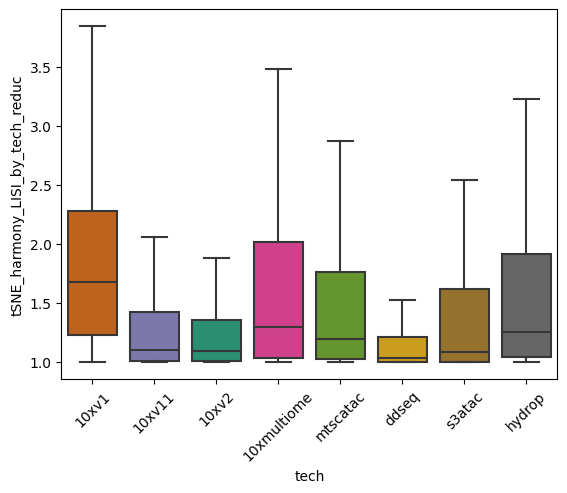

UMAP_harmony_LISI_by_sample_id


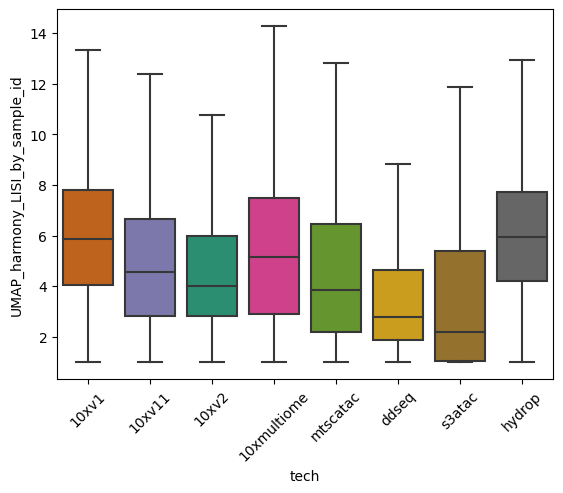

UMAP_harmony_LISI_by_tech


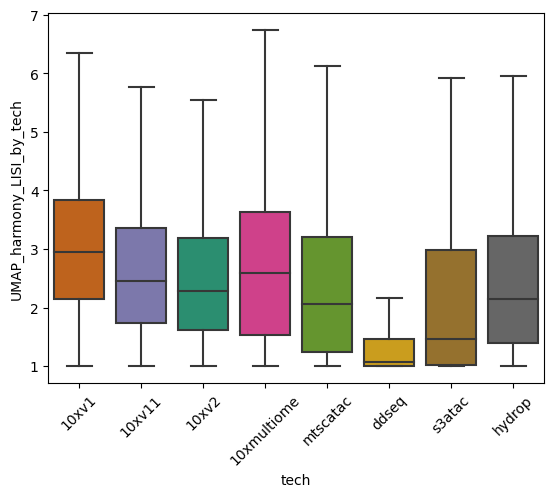

UMAP_harmony_LISI_by_center


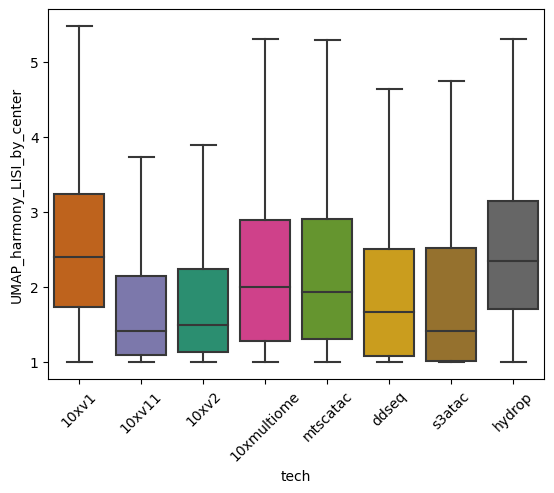

UMAP_harmony_LISI_by_tech_center


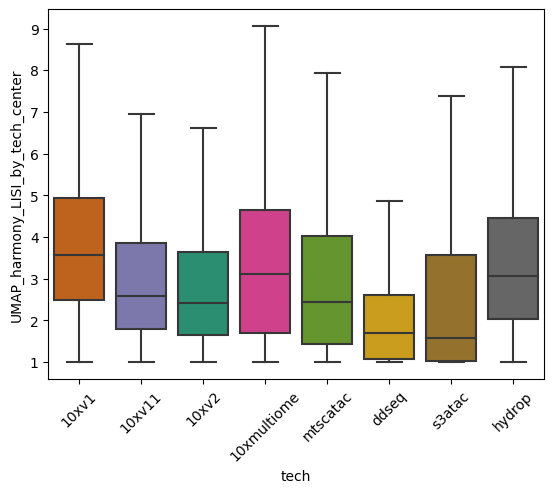

UMAP_harmony_LISI_by_seurat_cell_type_full_mega_harmony_consensus


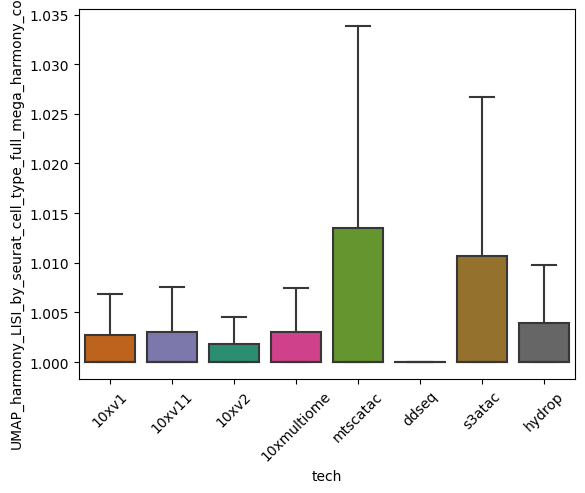

UMAP_harmony_LISI_by_seurat_cell_type_full_mega_consensus


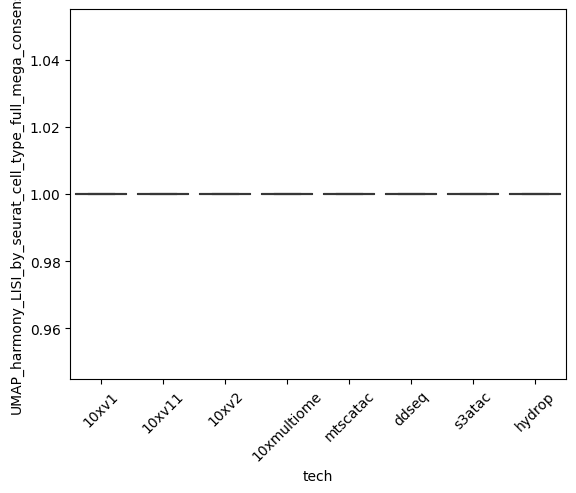

UMAP_harmony_LISI_by_tech_reduc


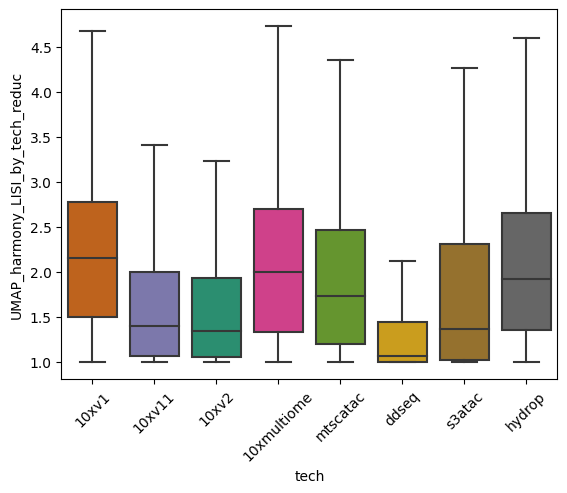

In [47]:
for contrast in list([x for x in df.columns if "LISI" in x]):
    print(contrast)
    sns.boxplot(
        df_lisi,
        y=contrast,
        x="tech",
        showfliers=False,
        palette=tech_color_palette,
        order=tech_order,
    )
    plt.xticks(rotation=45)
    plt.show()

In [48]:
list([x for x in df.columns if "LISI" in x])

['tSNE_LISI_by_sample_id',
 'tSNE_LISI_by_tech',
 'tSNE_LISI_by_center',
 'tSNE_LISI_by_tech_center',
 'tSNE_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
 'tSNE_LISI_by_seurat_cell_type_full_mega_consensus',
 'tSNE_LISI_by_tech_reduc',
 'UMAP_LISI_by_sample_id',
 'UMAP_LISI_by_tech',
 'UMAP_LISI_by_center',
 'UMAP_LISI_by_tech_center',
 'UMAP_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
 'UMAP_LISI_by_seurat_cell_type_full_mega_consensus',
 'UMAP_LISI_by_tech_reduc',
 'tSNE_harmony_LISI_by_sample_id',
 'tSNE_harmony_LISI_by_tech',
 'tSNE_harmony_LISI_by_center',
 'tSNE_harmony_LISI_by_tech_center',
 'tSNE_harmony_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
 'tSNE_harmony_LISI_by_seurat_cell_type_full_mega_consensus',
 'tSNE_harmony_LISI_by_tech_reduc',
 'UMAP_harmony_LISI_by_sample_id',
 'UMAP_harmony_LISI_by_tech',
 'UMAP_harmony_LISI_by_center',
 'UMAP_harmony_LISI_by_tech_center',
 'UMAP_harmony_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
 '

In [49]:
{x: x for x in df_lisi["tech_reduc"].unique()}

{'10x': '10x',
 '10xmtscatac': '10xmtscatac',
 'hydrop': 'hydrop',
 '10xmultiome': '10xmultiome',
 's3atac': 's3atac',
 'ddseq': 'ddseq'}

In [50]:
tech_reduc_alias_dict = {
    "s3atac": "s3-ATAC",
    "10x": "10x",
    "hydrop": "HyDrop",
    "ddseq": "ddSEQ",
    "10xmultiome": "10x Multiome",
    "10xmtscatac": "mtscATAC",
}

In [51]:
df_lisi["tech_reduc_alias"] = [tech_reduc_alias_dict[x] for x in df_lisi["tech_reduc"]]

In [52]:
tech_reduc_alias_order = [
    "10x",
    "10x Multiome",
    "mtscATAC",
    "ddSEQ",
    "HyDrop",
    "s3-ATAC",
]

In [53]:
tech_color_palette

{'10xv2': '#1b9e77',
 '10xv1': '#d95f02',
 '10xv11': '#7570b3',
 '10xmultiome': '#e7298a',
 'mtscatac': '#66a61e',
 'ddseq': '#e6ab02',
 's3atac': '#a6761d',
 'hydrop': '#666666'}

In [54]:
tech_reduc_alias_color_palette = {
    "10x": "#1b9e77",
    "ddSEQ": "#e6ab02",
    "HyDrop": "#666666",
    "s3-ATAC": "#a6761d",
    "mtscATAC": "#66a61e",
    "10x Multiome": "#e7298a",
}

In [55]:
tech_color_palette

{'10xv2': '#1b9e77',
 '10xv1': '#d95f02',
 '10xv11': '#7570b3',
 '10xmultiome': '#e7298a',
 'mtscatac': '#66a61e',
 'ddseq': '#e6ab02',
 's3atac': '#a6761d',
 'hydrop': '#666666'}

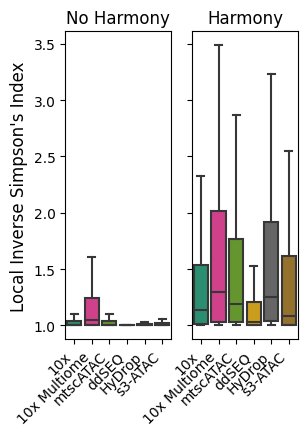

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(3, 4), sharey=True)

sns.boxplot(
    df_lisi,
    y="tSNE_LISI_by_tech_reduc",
    x="tech_reduc_alias",
    showfliers=False,
    palette=tech_reduc_alias_color_palette,
    order=tech_reduc_alias_order,
    ax=axes[0],
)
axes[0].set_xticklabels(tech_reduc_alias_order, rotation=45, ha="right")
axes[0].set_ylabel("Local Inverse Simpson's Index", fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("No Harmony")

sns.boxplot(
    df_lisi,
    y="tSNE_harmony_LISI_by_tech_reduc",
    x="tech_reduc_alias",
    showfliers=False,
    palette=tech_reduc_alias_color_palette,
    order=tech_reduc_alias_order,
    ax=axes[1],
)
axes[1].set_xticklabels(tech_reduc_alias_order, rotation=45, ha="right")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("Harmony")

plt.savefig("plts_final/mainfig_lisi.png", dpi=300, facecolor="white")
plt.savefig("plts_final/mainfig_lisi.svg", dpi=300, facecolor="white")

In [57]:
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

In [58]:
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}
tech_alias_color_palette

{'10x v2': '#1b9e77',
 '10x v1': '#d95f02',
 '10x v1.1': '#7570b3',
 '10x Multiome': '#e7298a',
 'mtscATAC': '#66a61e',
 'ddSEQ': '#e6ab02',
 's3-ATAC': '#a6761d',
 'HyDrop': '#666666'}

In [59]:
df_lisi["tech_alias"] = [tech_alias_dict[x] for x in df_lisi["tech"]]

In [60]:
df_lisi["tech"].unique()

array(['10xv2', 'mtscatac', 'hydrop', '10xv11', '10xmultiome', 's3atac',
       'ddseq', '10xv1'], dtype=object)

In [61]:
tech_alias_order = [tech_alias_dict[x] for x in tech_order]

In [62]:
tech_alias_order

['10x v1',
 '10x v1.1',
 '10x v2',
 '10x Multiome',
 'mtscATAC',
 'ddSEQ',
 's3-ATAC',
 'HyDrop']

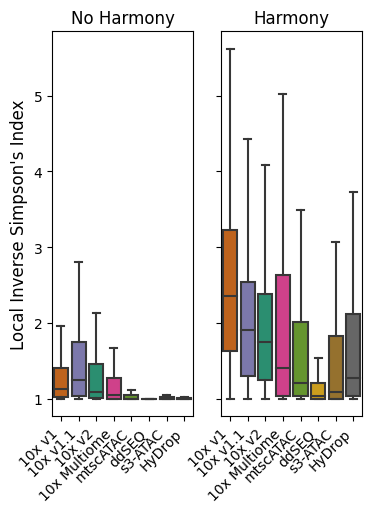

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(4, 5), sharey=True)

sns.boxplot(
    df_lisi,
    y="tSNE_LISI_by_tech",
    x="tech_alias",
    showfliers=False,
    palette=tech_alias_color_palette,
    order=tech_alias_order,
    ax=axes[0],
)
axes[0].set_xticklabels(tech_alias_order, rotation=45, ha="right")
axes[0].set_ylabel("Local Inverse Simpson's Index", fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("No Harmony")

sns.boxplot(
    df_lisi,
    y="tSNE_harmony_LISI_by_tech",
    x="tech_alias",
    showfliers=False,
    palette=tech_alias_color_palette,
    order=tech_alias_order,
    ax=axes[1],
)
axes[1].set_xticklabels(tech_alias_order, rotation=45, ha="right")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("Harmony")

plt.savefig("plts_final/mainfig_lisi_tech.png", dpi=300, facecolor="white")
plt.savefig("plts_final/mainfig_lisi_tech.svg", dpi=300, facecolor="white")

In [71]:
df_lisi.columns

Index(['tSNE_LISI_by_sample_id', 'tSNE_LISI_by_tech', 'tSNE_LISI_by_center',
       'tSNE_LISI_by_tech_center',
       'tSNE_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
       'tSNE_LISI_by_seurat_cell_type_full_mega_consensus',
       'tSNE_LISI_by_tech_reduc', 'UMAP_LISI_by_sample_id',
       'UMAP_LISI_by_tech', 'UMAP_LISI_by_center', 'UMAP_LISI_by_tech_center',
       'UMAP_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
       'UMAP_LISI_by_seurat_cell_type_full_mega_consensus',
       'UMAP_LISI_by_tech_reduc', 'tSNE_harmony_LISI_by_sample_id',
       'tSNE_harmony_LISI_by_tech', 'tSNE_harmony_LISI_by_center',
       'tSNE_harmony_LISI_by_tech_center',
       'tSNE_harmony_LISI_by_seurat_cell_type_full_mega_harmony_consensus',
       'tSNE_harmony_LISI_by_seurat_cell_type_full_mega_consensus',
       'tSNE_harmony_LISI_by_tech_reduc', 'UMAP_harmony_LISI_by_sample_id',
       'UMAP_harmony_LISI_by_tech', 'UMAP_harmony_LISI_by_center',
       'UMAP_harmony_LISI_by

tSNE_LISI_by_tech_reduc


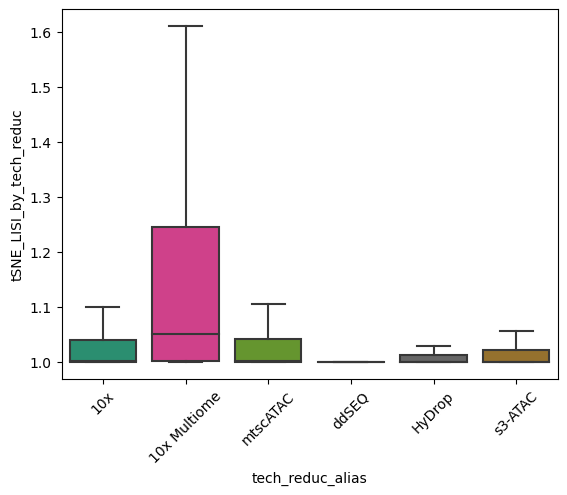

tSNE_harmony_LISI_by_tech_reduc


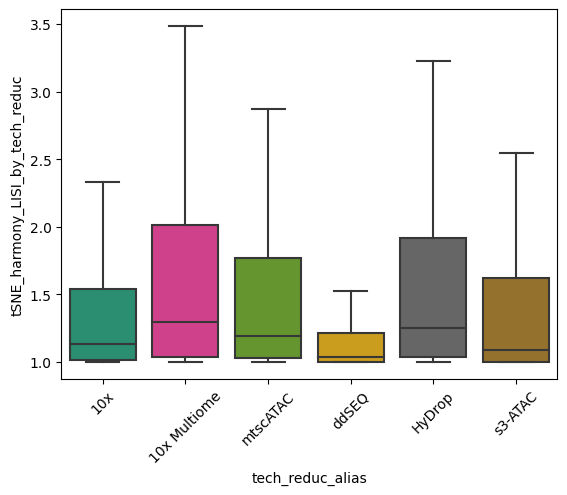

tSNE_harmony_LISI_by_seurat_cell_type_full_mega_harmony_consensus


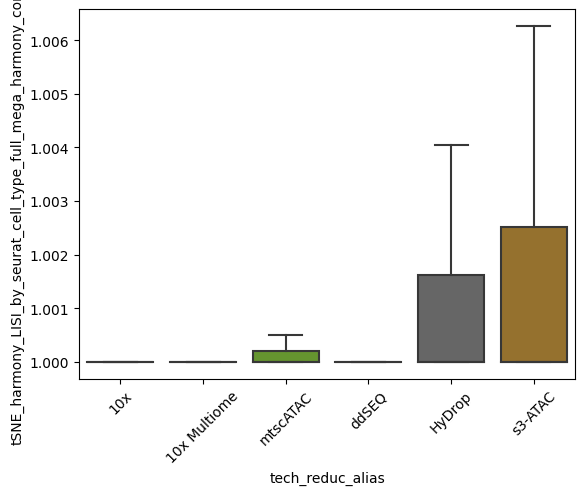

In [73]:
for contrast in [
    "tSNE_LISI_by_tech_reduc",
    "tSNE_harmony_LISI_by_tech_reduc",
    "tSNE_harmony_LISI_by_seurat_cell_type_full_mega_harmony_consensus",
]:
    print(contrast)
    sns.boxplot(
        df_lisi,
        y=contrast,
        x="tech_reduc_alias",
        showfliers=False,
        palette=tech_reduc_alias_color_palette,
        order=tech_reduc_alias_order,
    )
    plt.xticks(rotation=45)
    plt.show()

In [74]:
df_lisi_medians = (
    df_lisi[["tSNE_LISI_by_tech", "tSNE_harmony_LISI_by_tech", "sample", "tech"]]
    .groupby("sample")
    .median()
)

/tmp/ipykernel_2492018/752514121.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_lisi[["tSNE_LISI_by_tech", "tSNE_harmony_LISI_by_tech", "sample", "tech"]]


<AxesSubplot: ylabel='sample'>

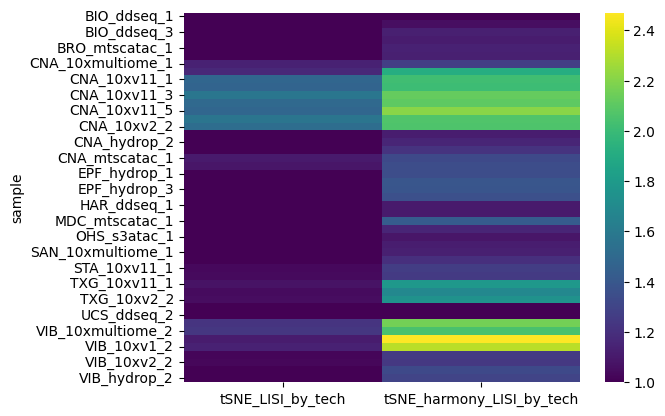

In [75]:
sns.heatmap(df_lisi_medians, cmap="viridis")

# re-calculate harmony

In [76]:
df = pd.read_csv(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data__updated.tsv",
    sep="\t",
    index_col=0,
    header=0,
)

/tmp/ipykernel_2492018/890939925.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [77]:
with open(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.pkl",
    "rb",
) as f:
    cto = pickle.load(f)
    cto.cell_data = df

In [79]:
cto.cell_data["tech_reduc"] = [reduc_alias_dict[x] for x in cto.cell_data["tech"]]

In [80]:
if not "tSNE_harmony_tech_reduc" in cto.projections["cell"].keys():
    from pycisTopic.clust_vis import harmony
    from pycisTopic.clust_vis import (
        find_clusters,
        run_umap,
        run_tsne,
        plot_metadata,
        plot_topic,
    )

    harmony(cto, "tech_reduc", random_state=555, max_iter_harmony=20)

    run_umap(cto, target="cell", reduction_name="UMAP_harmony_tech_reduc", harmony=True)
    run_tsne(cto, target="cell", reduction_name="tSNE_harmony_tech_reduc", harmony=True)

2023-03-22 17:04:53,155 - harmonypy - INFO - Iteration 1 of 20
INFO:harmonypy:Iteration 1 of 20
2023-03-22 17:05:32,710 - harmonypy - INFO - Iteration 2 of 20
INFO:harmonypy:Iteration 2 of 20
2023-03-22 17:06:12,137 - harmonypy - INFO - Iteration 3 of 20
INFO:harmonypy:Iteration 3 of 20
2023-03-22 17:06:51,808 - harmonypy - INFO - Iteration 4 of 20
INFO:harmonypy:Iteration 4 of 20
2023-03-22 17:07:31,230 - harmonypy - INFO - Iteration 5 of 20
INFO:harmonypy:Iteration 5 of 20
2023-03-22 17:08:10,846 - harmonypy - INFO - Iteration 6 of 20
INFO:harmonypy:Iteration 6 of 20
2023-03-22 17:08:50,356 - harmonypy - INFO - Converged after 6 iterations
INFO:harmonypy:Converged after 6 iterations


Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems)
Using perplexity, not the manually set kernel width.  K (number of nearest neighbors) and sigma (bandwidth) parameters are going to be ignored.
Using ANNOY for knn search, with parameters: n_trees 50 and search_k 4500
Going to allocate memory. N: 169047, K: 90, N*K = 15214230
Building Annoy tree...
Done building tree. Beginning nearest neighbor search... 
parallel (72 threads):


In [81]:
dimreduc_list = [
    "tSNE",
    "UMAP",
    "tSNE_harmony",
    "UMAP_harmony",
    "UMAP_harmony_tech_reduc",
    "tSNE_harmony_tech_reduc",
]
var_list = ["fmx_sample"]

In [82]:
for dimreduc in dimreduc_list:
    for var in var_list:
        if not f"{dimreduc}_LISI_by_{var}" in df.columns:
            cell_data_subset = cto.cell_data.loc[~cto.cell_data[var].isna()]

            dimreduc_subset = cto.projections["cell"][dimreduc].loc[
                cell_data_subset.index
            ]
            lisi = compute_lisi(
                dimreduc_subset.to_numpy(),
                metadata=cell_data_subset,
                label_colnames=[var],
            )

            cell_data_subset[f"{dimreduc}_LISI_by_{var}"] = lisi
            df[f"{dimreduc}_LISI_by_{var}"] = cell_data_subset[
                f"{dimreduc}_LISI_by_{var}"
            ]
        else:
            print(f"{dimreduc}_LISI_by_{var} already in columns")

df.to_csv(
    "cistopic_objects_master/master_all_1.FULL__cto.scrublet0-4.fmx.singlets.model_60topics.dimreduc.consensus_harmony.cell_data__updated.tsv",
    sep="\t",
    index=True,
    header=True,
)


KeyboardInterrupt



In [ ]:
df_lisi = df[list([x for x in df.columns if "LISI" in x])]

df_lisi["sample"] = [x.split("___")[1].split(".")[0] for x in df_lisi.index]
df_lisi["tech"] = [x.split("_")[1] for x in df_lisi["sample"]]
df_lisi["centre"] = [x.split("_")[0] for x in df_lisi["sample"]]
df_lisi["tech_centre"] = df_lisi["tech"] + "_" + df_lisi["centre"]
df_lisi["harmony_consensus_cell_type__mega"] = cto.cell_data[
    "harmony_consensus_cell_type__mega"
]
df_lisi

In [ ]:
for contrast in [
    "tSNE_LISI_by_tech_reduc",
    "tSNE_harmony_LISI_by_tech_reduc",
    "tSNE_harmony_tech_reduc_LISI_by_tech_reduc",
    "tSNE_harmony_tech_reduc_LISI_by_fmx_sample",
    "seurat_cell_type_full_mega_harmony_consensus",
]:
    print(contrast)
    sns.boxplot(
        df_lisi,
        y=contrast,
        x="tech",
        showfliers=False,
        palette=tech_color_palette,
        order=tech_order,
    )
    plt.xticks(rotation=45)
    plt.show()

# Plot tSNE

In [85]:
cto.cell_data = df

In [86]:
cto.cell_data["tSNE_1_harmony_tech_reduc"] = cto.projections["cell"][
    "tSNE_harmony_tech_reduc"
]["tSNE_1"]
cto.cell_data["tSNE_2_harmony_tech_reduc"] = cto.projections["cell"][
    "tSNE_harmony_tech_reduc"
]["tSNE_2"]

<AxesSubplot: xlabel='tSNE_1_harmony_tech_reduc', ylabel='tSNE_2_harmony_tech_reduc'>

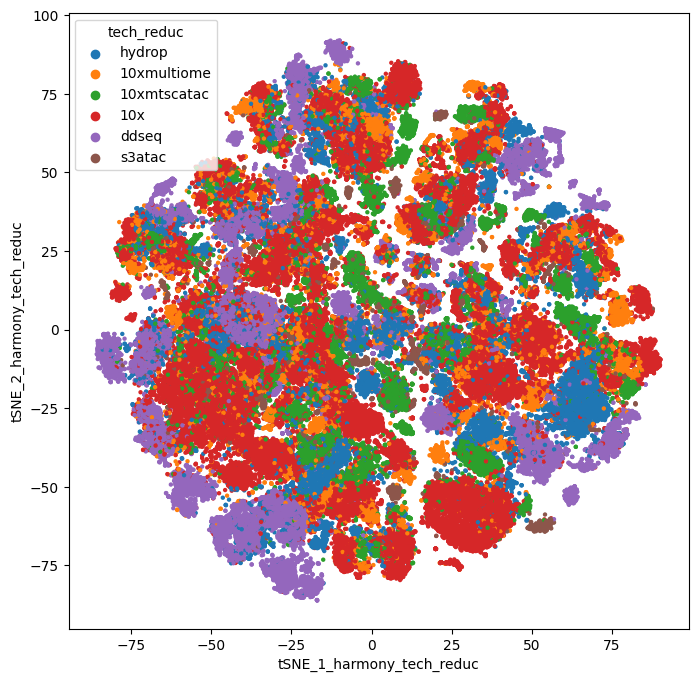

In [87]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    data=df.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="tech_reduc",
    linewidth=0,
    ax=ax,
    s=10,
)

In [88]:
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}
tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "Bio-Rad ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}
cell_type_color_dict = {
    "B_cell": "#88CCEE",
    "CD14+_monocyte": "#CC6677",
    "CD4+_T_cell": "#DDCC77",
    "Cytotoxic_T_cell": "#117733",
    "Dendritic_cell": "#332288",
    "Natural_killer_cell": "#AA4499",
    "CD16+_monocyte": "#44AA99",
}
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "Natural killer cells",
    "CD16+_monocyte": "CD16+ monocytes",
}
cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]
cell_type_alias_order = [cell_type_alias_dict[x] for x in cell_type_order]
cell_type_alias_color_dict = {
    cell_type_alias_dict[x]: cell_type_color_dict[x]
    for x in cell_type_alias_dict.keys()
}
cell_type_alias_color_dict

{'B cells': '#88CCEE',
 'CD14+ monocytes': '#CC6677',
 'Naive T cells': '#DDCC77',
 'Cytotoxic T cells': '#117733',
 'Dendritic cells': '#332288',
 'Natural killer cells': '#AA4499',
 'CD16+ monocytes': '#44AA99'}

In [89]:
cell_type_alias_order

['B cells',
 'CD14+ monocytes',
 'Naive T cells',
 'Cytotoxic T cells',
 'Dendritic cells',
 'Natural killer cells',
 'CD16+ monocytes']

In [90]:
cto.cell_data["tech_alias"] = [tech_alias_dict[x] for x in cto.cell_data["tech"]]

In [93]:
cto.cell_data.columns

Index(['cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'cisTopic_nr_frag',
       'cisTopic_log_nr_frag', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'fmx_droplet_type', 'fmx_sample',
       'pycisTopic_leiden_10_3.0', 'seurat_cell_type_pred_score_individual',
       'seurat_cell_type_individual', 'consensus_cell_type_individual',
       'seurat_cell_type_full_mega', 'seurat_cell_type_full_mega_pred_score',
       'seurat_cell_type_full_mega_consensus', 'consensus_cell_type', 'tech',
       'harmony_pycisTopic_leiden_10_3.0',
       'seurat_cell_type_full_mega_harmony_consensus', 'UMAP_1', 'UMAP_2',
       'tSNE_1', 'tSNE_2', 'center', 'tech_center', 'tSNE_LISI_by_sample_id',
       'tSNE_LISI_by_tech', 'tSNE_LISI_by_center', 'tSNE_LISI_b

In [94]:
cto.cell_data["seurat_cell_type_full_mega_harmony_consensus"] = [
    (x.replace("CD4+ T cell", "Naive T cell") + "s")
    .replace("ss", "s")
    .replace("ss", "s")
    for x in cto.cell_data["seurat_cell_type_full_mega_harmony_consensus"]
]

In [95]:
cto.cell_data["seurat_cell_type_full_mega_harmony_consensus"].unique()

array(['Natural killer cells', 'Cytotoxic T cells', 'CD14+ monocytes',
       'Naive T cells', 'B cells', 'CD16+ monocytes', 'Dendritic cells'],
      dtype=object)

In [96]:
cto.cell_data.columns

Index(['cisTopic_nr_acc', 'cisTopic_log_nr_acc', 'cisTopic_nr_frag',
       'cisTopic_log_nr_frag', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'fmx_droplet_type', 'fmx_sample',
       'pycisTopic_leiden_10_3.0', 'seurat_cell_type_pred_score_individual',
       'seurat_cell_type_individual', 'consensus_cell_type_individual',
       'seurat_cell_type_full_mega', 'seurat_cell_type_full_mega_pred_score',
       'seurat_cell_type_full_mega_consensus', 'consensus_cell_type', 'tech',
       'harmony_pycisTopic_leiden_10_3.0',
       'seurat_cell_type_full_mega_harmony_consensus', 'UMAP_1', 'UMAP_2',
       'tSNE_1', 'tSNE_2', 'center', 'tech_center', 'tSNE_LISI_by_sample_id',
       'tSNE_LISI_by_tech', 'tSNE_LISI_by_center', 'tSNE_LISI_b

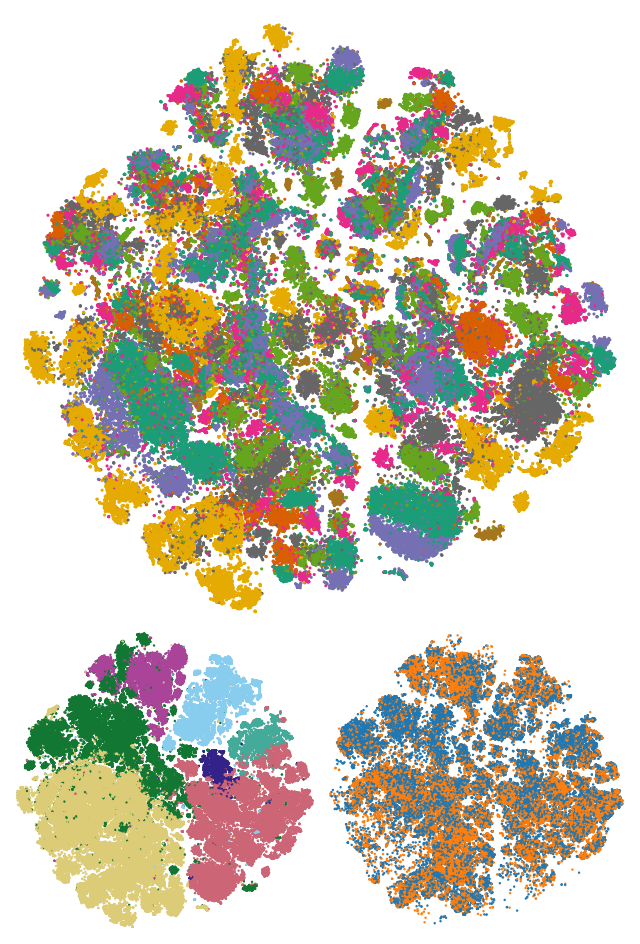

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(
    3, 2, hspace=0, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])
# ax4 = fig.add_subplot(gs[2, -1])

sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="tech_alias",
    palette=tech_alias_color_palette,
    hue_order=tech_alias_order,
    linewidth=0,
    ax=ax1,
    s=5,
    alpha=1,
    legend=False,
)
sns.despine(left=True, bottom=True)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="seurat_cell_type_full_mega_harmony_consensus",
    palette=cell_type_alias_color_dict,
    hue_order=cell_type_alias_order,
    linewidth=0,
    ax=ax2,
    s=3,
    alpha=1,
    legend=False,
)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="fmx_sample",
    # palette=tech_alias_color_palette,
    # hue_order=tech_alias_order,
    linewidth=0,
    ax=ax3,
    s=3,
    alpha=1,
    legend=False,
)
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1_harmony_tech_reduc",
#     y="tSNE_2_harmony_tech_reduc",
#     hue="tech_alias",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax4,
#     s=5,
#     alpha=1,
#     legend=False,
# )
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1_harmony_tech_reduc"].min() * 1.05,
            cto.cell_data["tSNE_1_harmony_tech_reduc"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_2_harmony_tech_reduc"].min() * 1.05,
            cto.cell_data["tSNE_2_harmony_tech_reduc"].max() * 1.05,
        )
    )
plt.savefig("plts_final/tSNE_harmony_tech_reduc_mainfig.png", dpi=900, facecolor=None)
plt.show()

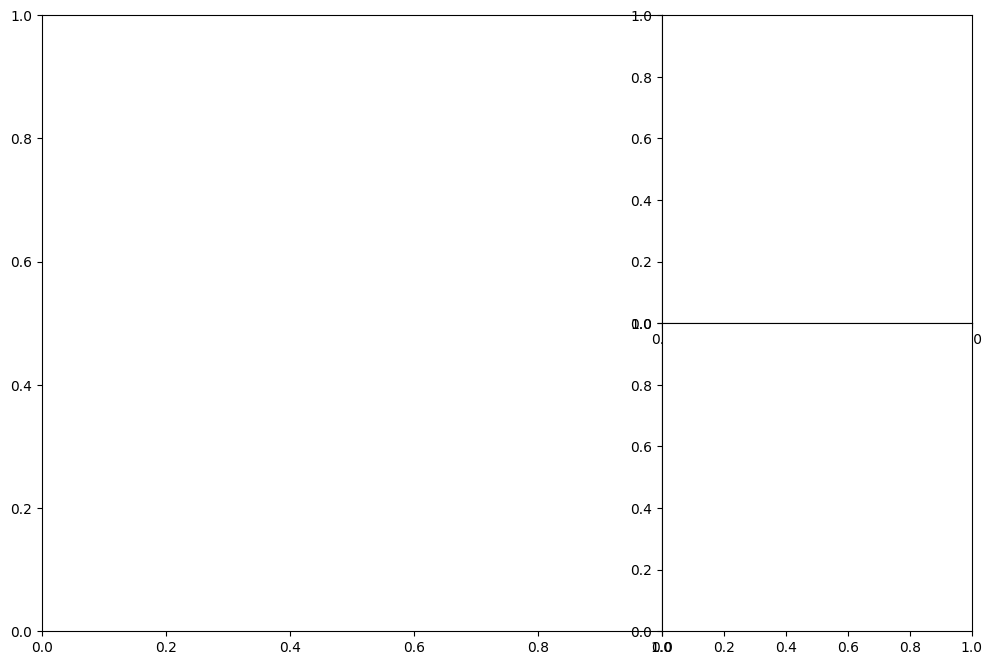

In [115]:
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(
    2, 3, hspace=0, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[:, :-1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 2])
# ax4 = fig.add_subplot(gs[2, -1])

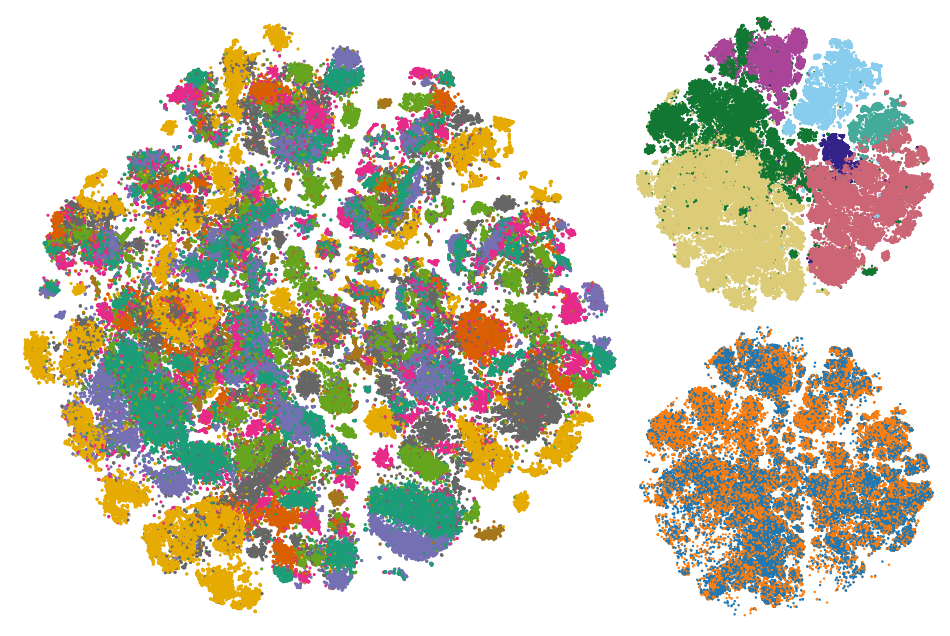

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# generate some data
# plot it
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(
    2, 3, hspace=0, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[:, :-1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 2])
# ax4 = fig.add_subplot(gs[2, -1])

sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="tech_alias",
    palette=tech_alias_color_palette,
    hue_order=tech_alias_order,
    linewidth=0,
    ax=ax1,
    s=5,
    alpha=1,
    legend=False,
)
sns.despine(left=True, bottom=True)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="seurat_cell_type_full_mega_harmony_consensus",
    palette=cell_type_alias_color_dict,
    hue_order=cell_type_alias_order,
    linewidth=0,
    ax=ax2,
    s=3,
    alpha=1,
    legend=False,
)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="fmx_sample",
    # palette=tech_alias_color_palette,
    # hue_order=tech_alias_order,
    linewidth=0,
    ax=ax3,
    s=3,
    alpha=1,
    legend=False,
)
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1_harmony_tech_reduc",
#     y="tSNE_2_harmony_tech_reduc",
#     hue="tech_alias",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax4,
#     s=5,
#     alpha=1,
#     legend=False,
# )
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1_harmony_tech_reduc"].min() * 1.05,
            cto.cell_data["tSNE_1_harmony_tech_reduc"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_2_harmony_tech_reduc"].min() * 1.05,
            cto.cell_data["tSNE_2_harmony_tech_reduc"].max() * 1.05,
        )
    )
plt.savefig("plts_final/tSNE_harmony_tech_reduc_mainfig.png", dpi=900, facecolor=None)
plt.show()

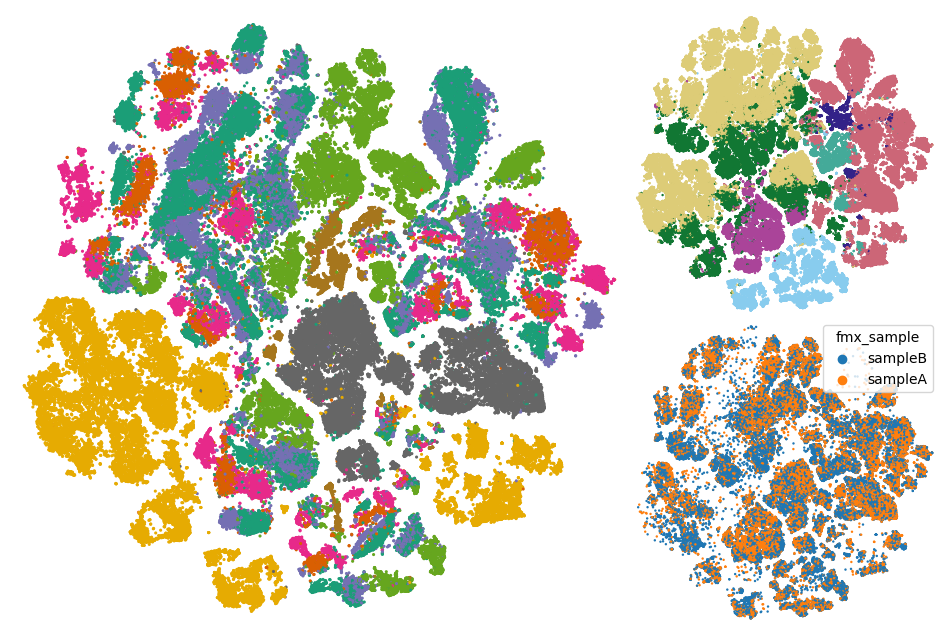

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(
    2, 3, hspace=0, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[:, :-1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 2])
# ax4 = fig.add_subplot(gs[2, -1])

sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="tech_alias",
    palette=tech_alias_color_palette,
    hue_order=tech_alias_order,
    linewidth=0,
    ax=ax1,
    s=5,
    alpha=1,
    legend=False,
)
sns.despine(left=True, bottom=True)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="seurat_cell_type_full_mega_harmony_consensus",
    palette=cell_type_alias_color_dict,
    hue_order=cell_type_alias_order,
    linewidth=0,
    ax=ax2,
    s=3,
    alpha=1,
    legend=False,
)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="fmx_sample",
    # palette=tech_alias_color_palette,
    # hue_order=tech_alias_order,
    linewidth=0,
    ax=ax3,
    s=3,
    alpha=1,
    # legend=False,
)
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1_harmony_tech_reduc",
#     y="tSNE_2_harmony_tech_reduc",
#     hue="tech_alias",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax4,
#     s=5,
#     alpha=1,
#     legend=False,
# )
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1"].min() * 1.05,
            cto.cell_data["tSNE_1"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_2"].min() * 1.05,
            cto.cell_data["tSNE_2"].max() * 1.05,
        )
    )
plt.savefig("plts_final/tSNE_mainfig.png", dpi=900, facecolor=None)
plt.show()